<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista1/quest%C3%A3o_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
'''
IO 'Lista1_Conjunto1.xlsx' into Pandas Dataframe
Selected only columns with valid data. Excluded NaN.
Renamed columns names.

'''
data = pd.read_excel('Lista1_Conjunto1.xlsx', skiprows=1, usecols=[2,3,4,5,6,7])
data.columns = data.loc[[0]].values.reshape(-1)
data.head()

,V1,V2,V3,V4,V5,V6
0,V1,V2,V3,V4,V5,V6
1,5.1,3.5,4.95,1.4,1.96,0.2
2,4.9,3,5.3,1.4,1.96,0.2
3,4.7,3.2,4.6,1.3,1.69,0.2
4,4.6,3.1,4.55,1.5,2.25,0.2


In [3]:
'''
Execute this only once in a runtime session.
This delete only the first column, ['V1', 'V2', ...'V6']
'''
data.drop([0], inplace=True)

In [4]:
data.astype(float).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,150.0,5.843333,0.828066,4.3,5.1000,5.800,6.4000,7.90
V2,150.0,3.057333,0.435866,2.0,2.8000,3.000,3.3000,4.40
V3,150.0,7.100667,1.850630,3.8,5.1625,7.400,8.5875,11.50
V4,150.0,3.758000,1.765298,1.0,1.6000,4.350,5.1000,6.90
V5,150.0,17.218067,12.627044,1.0,2.5600,18.925,26.0100,47.61
V6,150.0,1.199333,0.762238,0.1,0.3000,1.300,1.8000,2.50


In [5]:
def stats(variable):
  var_dic = {}
  var_dic['Mean'] = np.mean(variable)
  var_dic['Median'] = np.median(variable)
  var_dic['Mode'] = mode(variable, axis=None)
  var_dic['Variance'] = np.var(variable)
  var_dic['Std'] = np.std(variable)
  return var_dic

In [6]:
def describe_custom(variable, print_data=True):
  dic = stats(variable)
  
  fig, ax = plt.subplots(figsize=(8,7))
  ax = sns.distplot(variable, bins=15)
  ax.set_title(variable.name)
  ax.set_xlabel('')
  plt.show()
  if print_data == True:
    for key in dic:
      print('{}: '.format(key) + '{}'.format(dic[key]))
    print('\n')
  

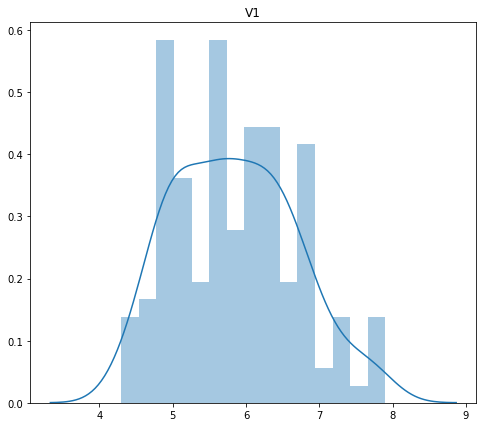

Mean: 5.843333333333335
Median: 5.8
Mode: ModeResult(mode=array([5], dtype=object), count=array([10]))
Variance: 0.6811222222222223
Std: 0.8253012917851409




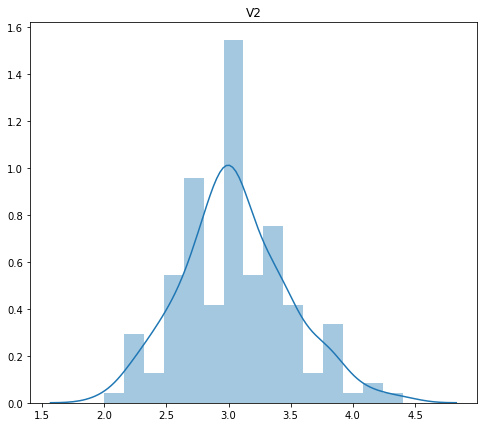

Mean: 3.057333333333334
Median: 3.0
Mode: ModeResult(mode=array([3], dtype=object), count=array([26]))
Variance: 0.1887128888888889
Std: 0.4344109677354946




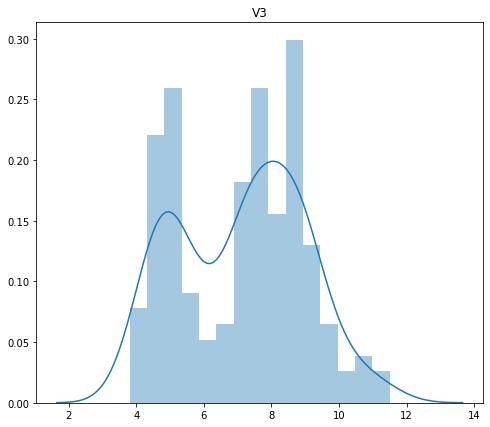

Mean: 7.100666666666666
Median: 7.4
Mode: ModeResult(mode=array([4.5], dtype=object), count=array([5]))
Variance: 3.4019995555555558
Std: 1.8444510173912334




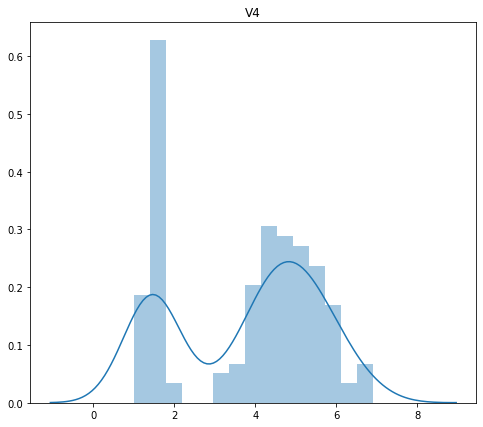

Mean: 3.7580000000000027
Median: 4.35
Mode: ModeResult(mode=array([1.4], dtype=object), count=array([13]))
Variance: 3.0955026666666665
Std: 1.759404065775303




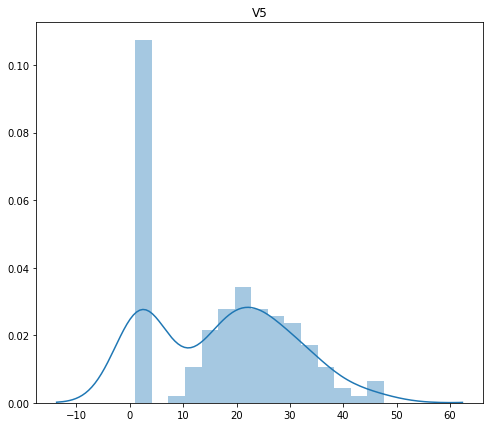

Mean: 17.21806666666667
Median: 18.925
Mode: ModeResult(mode=array([1.9599999999999997], dtype=object), count=array([13]))
Variance: 158.37928092888887
Std: 12.584883031990758




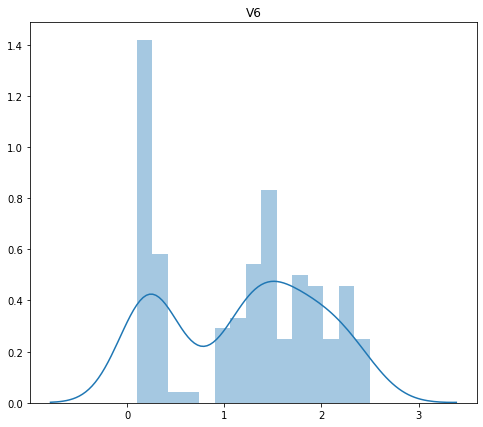

Mean: 1.199333333333334
Median: 1.3
Mode: ModeResult(mode=array([0.2], dtype=object), count=array([29]))
Variance: 0.5771328888888888
Std: 0.7596926279021594




In [7]:
describe_custom(data['V1'])
describe_custom(data['V2'])
describe_custom(data['V3'])
describe_custom(data['V4'])
describe_custom(data['V5'])
describe_custom(data['V6'])

In [8]:
'''
Min Max Normalization
[0, 1]
'''
scaler = preprocessing.MinMaxScaler()
data_norm_io = pd.DataFrame(scaler.fit_transform(data.to_numpy()), 
                            columns=data.columns)
data_norm_io.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,150.0,0.428704,0.230018,0.0,0.222222,0.416667,0.583333,1.0
V2,150.0,0.440556,0.181611,0.0,0.333333,0.416667,0.541667,1.0
V3,150.0,0.428658,0.240342,0.0,0.176948,0.467532,0.621753,1.0
V4,150.0,0.467458,0.299203,0.0,0.101695,0.567797,0.694915,1.0
V5,150.0,0.347953,0.270908,0.0,0.033469,0.384574,0.536580,1.0
V6,150.0,0.458056,0.317599,0.0,0.083333,0.500000,0.708333,1.0


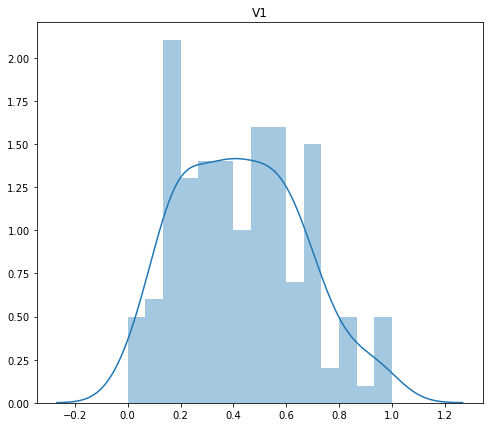

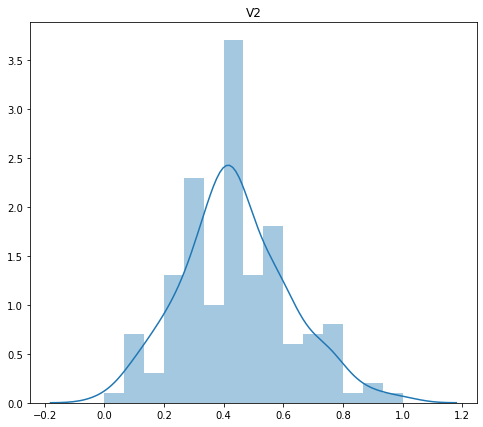

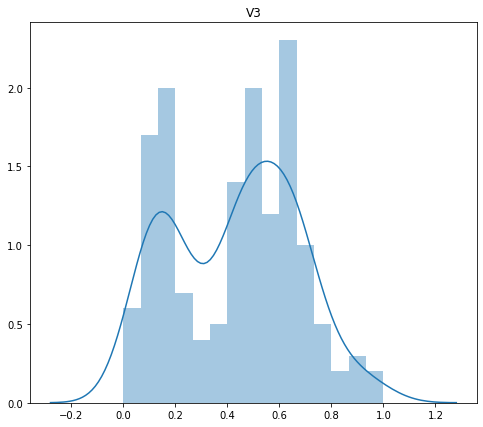

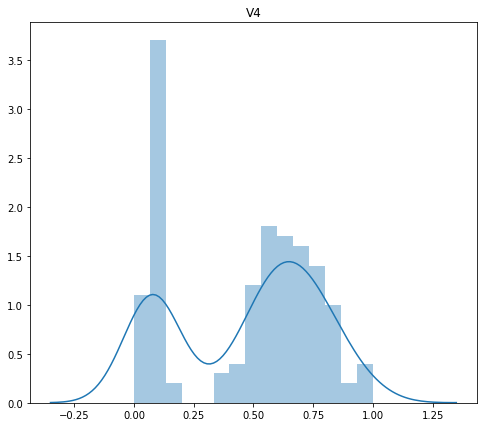

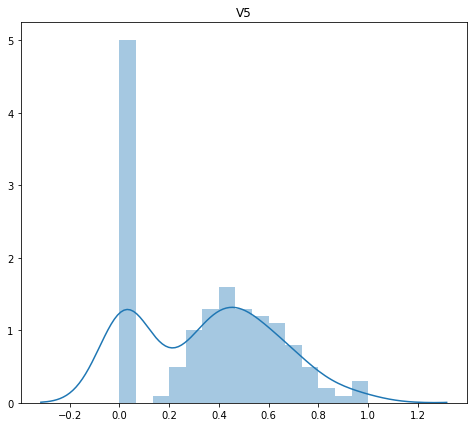

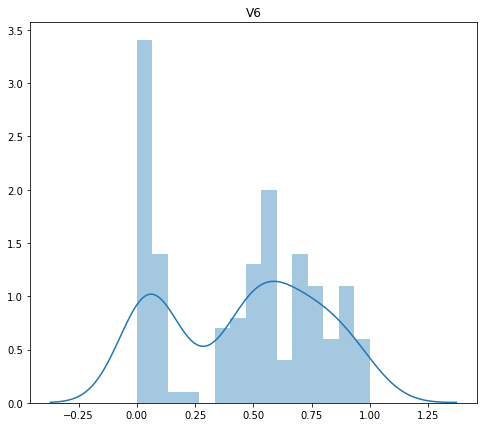

In [9]:
for var in data_norm_io.columns:
  describe_custom(data_norm_io[var], print_data=False)

In [10]:
'''
Z-Score Normalization
'''
z_scaler = preprocessing.StandardScaler()
data_zscore = data_norm_io = pd.DataFrame(z_scaler.fit_transform(data.to_numpy()), 
                            columns=data.columns)
data_zscore.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,150.0,-2.775558e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
V2,150.0,-9.695948e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
V3,150.0,4.424239e-16,1.00335,-1.789512,-1.050810,0.162289,0.806112,2.385172
V4,150.0,-8.652338e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
V5,150.0,1.687539e-16,1.00335,-1.288694,-1.164736,0.135634,0.698611,2.414956
V6,150.0,-4.662937e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


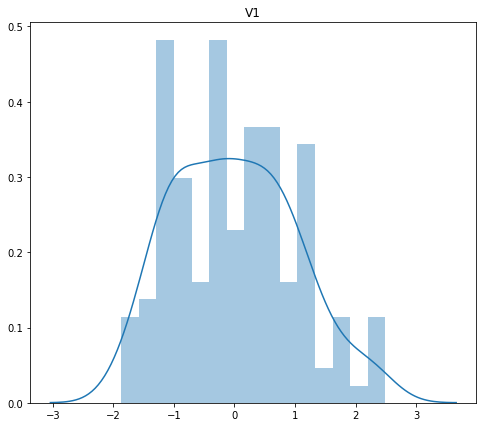

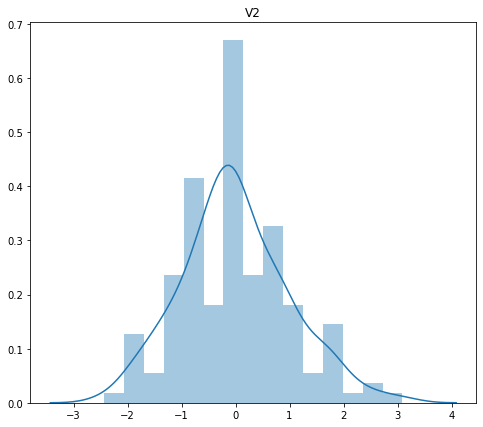

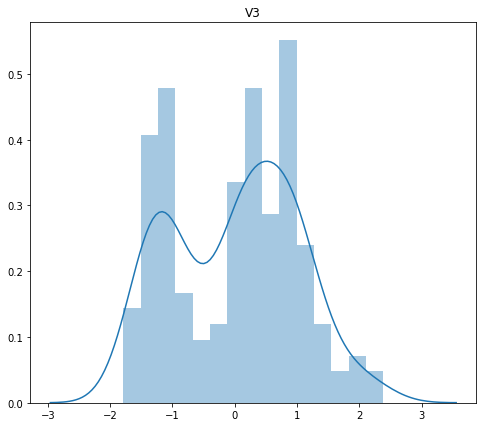

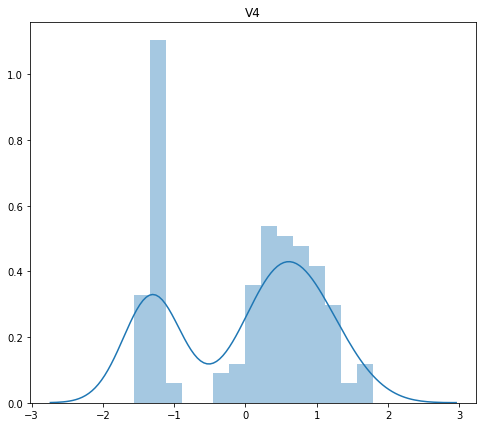

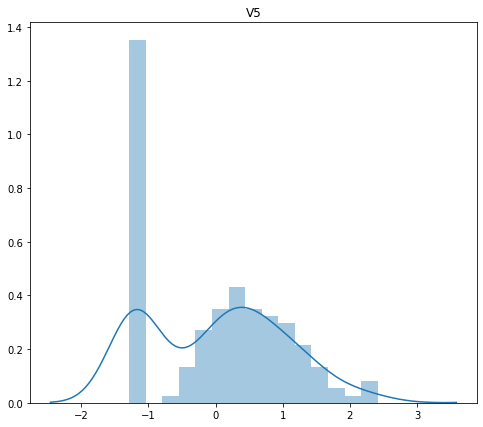

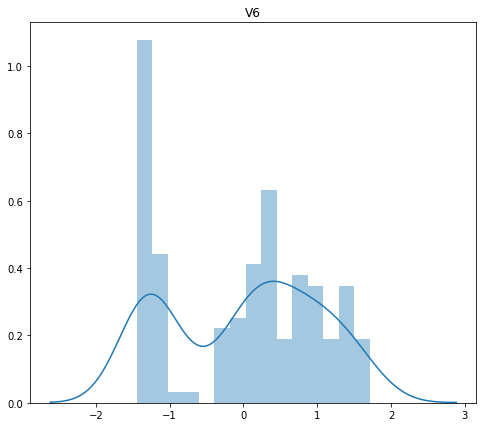

In [11]:
for var in data_zscore.columns:
  describe_custom(data_zscore[var], print_data=False)

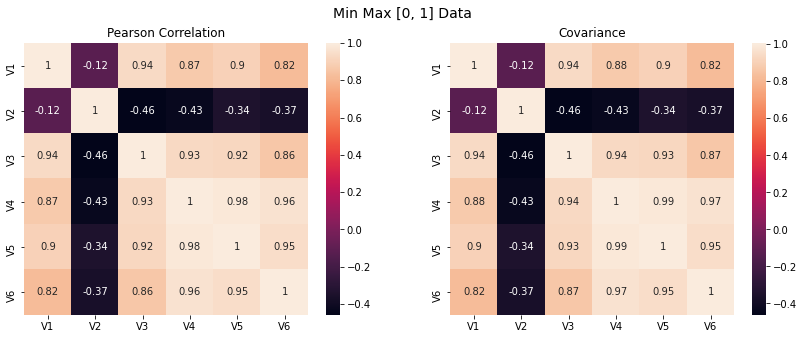

In [12]:
'''
Min Max Data
Correlation and Covariance Matrix

'''
fig, ax = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('Min Max [0, 1] Data', fontsize=14)

ax = sns.heatmap(data_norm_io.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sns.heatmap(data_norm_io.cov(), annot=True)
ax.set_title('Covariance')

plt.show()

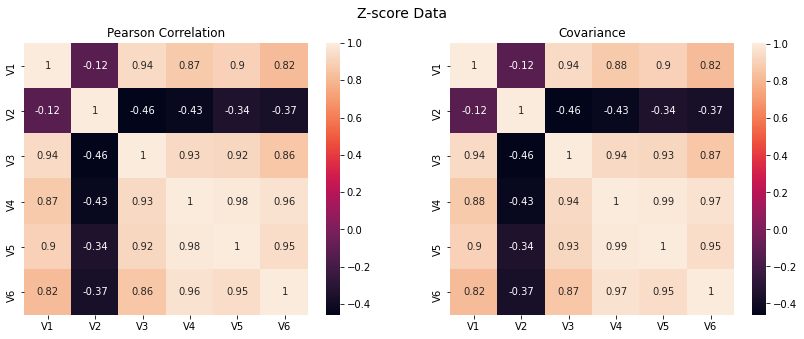

In [13]:
'''
Z-score Data
Correlation and Covariance Matrix

'''
fig, ax = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('Z-score Data', fontsize=14)

ax = sns.heatmap(data_zscore.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sns.heatmap(data_zscore.cov(), annot=True)
ax.set_title('Covariance')

plt.show()